# Aquiring and displaying spatial data

There are many different ways to download files from the internet using Python. One popular way, often used in research, is to connect to an FTP server and download your files that way. To achieve this all you need is your standard installation of Python. It includes a library called ftplib, which has all the bits and pieces we need to accomplish this task. 

To begin, we first need to load the packages we will need. 

In [16]:
import os, shutil, wget
import urllib.request

It is also very helpful to specify a working folder. Examples of this could include 'C:temp' or for the purposes of this workshop 'C:\ACWA_workshop_files'. To create a working directory we can specify the file path and if the folder does not exist have Windows create it.

In [17]:
working_directory = r'C:\temp\EPA_webinars\Ex1_aquiring data'
if not os.path.exists(working_directory): os.makedirs(working_directory)

To download from an FTP site you will need the web address, and, in some instances when a username and password are required, those two pieces of information as well.

In this example we will be downloading PRISM precipitation gridded data (https://prism.oregonstate.edu/) as a web service. Using this method we can bulk download as much data as we want, for specific variables and for specific time periods. To make things easier for the user, PRISM has also provided a handy cheat sheet for bulk downloads that can be referenced here: https://prism.oregonstate.edu/documents/PRISM_downloads_web_service.pdf. The document tells us how to connect and download the data. We've summarized the document for you here:

### PRISM Daily, Monthly, Annual Data Request Syntax
To initiate a request via this web service, use a client (web browser, the wget utility, etc.) that can perform an HTTP
connection with the following parameters: http://services.nacse.org/prism/data/public/4km/element/date

Where:
- element is: 
> - ppt, tmin, tmax, tmean, tdmean, vpdmin, or vpdmax 
- date is:
> - YYYYMMDD for daily data (between yesterday and January 1st, 1981) – returns a single grid in a .zip file
> - YYYYMM for monthly data (between last month and January 1981) – returns a single grid in a .zip file
> - YYYY for annual data (between last year and 1981) – returns a single grid in a .zip file
> - YYYY for historical data (between 1980 and 1895) – returns a single zip file containing 12 monthly grids for YYYY plus the annual.

Valid HTTP examples:
> Daily grid: http://services.nacse.org/prism/data/public/4km/tmin/20090405 

> Monthly grid: http://services.nacse.org/prism/data/public/4km/tmin/200904 

> Annual grid: http://services.nacse.org/prism/data/public/4km/tmin/2009 

> Historical monthly data: http://services.nacse.org/prism/data/public/4km/tmin/1944 

In the example below we will download 4 kilometer resolution gridded precipitation data for August 2008.

In [18]:
url = 'http://services.nacse.org/prism/data/public/4km/tmax/200808'
savedFile = os.path.join(working_directory, 'PRISM_4km_tmax_200808.zip')

wget.download(url, savedFile)

'C:\\temp\\EPA_webinars\\Ex1_aquiring data\\PRISM_4km_tmax_200808.zip'

### PRISM Normals Request Syntax
The normals are baseline datasets describing average monthly and annual conditions over the most recent three full decades. They are our most popular datasets. The current PRISM normals cover the period 1981-2010.

To initiate a request via this web service, use a HTTP connection with the following parameters: http://services.nacse.org/prism/data/public/normals/resolution/element/month

Where:
- resolution is 4km or 800m
- element is ppt, tmin, tmax, tmean, tdmean, vpdmin, or vpdmax
- month is:
> - MM with a range of 01-12, or the value 14, which provides the annual normal grid

Valid HTTP examples:
> March 800m ppt normal: http://services.nacse.org/prism/data/public/normals/800m/ppt/03

> October 4km tmin normal: http://services.nacse.org/prism/data/public/normals/4km/tmin/10

> Annual 800m tmax normal: http://services.nacse.org/prism/data/public/normals/4km/tmax/14

In the example below we will download 800 meter resolution gridded precipitation data for the March normal (1981-2010).

In [19]:
url = 'http://services.nacse.org/prism/data/public/normals/800m/ppt/03'
savedFile = savedFile = os.path.join(working_directory, 'PRISM_normals_800m_ppt_03.zip')

wget.download(url, savedFile)

KeyboardInterrupt: 

### PRISM Bulk downloading
There are several methods for iteratively downloading a batch of datasets. Below is an easy to follow example of using FOR loops to download the monthly grids for January, February and March in 4 kilometer resolution for the year 2009.

The first example iterates through the monthly numbers (e.g. '01') and adds them to the url. 

In [20]:
months = ('01', '02', '03')

for month in months:
    
    url = 'http://services.nacse.org/prism/data/public/4km/ppt/2009' + month
    savedFile = savedFile = os.path.join(working_directory, 'PRISM_4km_ppt_2009' + month + '.zip')

    wget.download(url, savedFile)

We can easily extend this for multiple years by adding an additional FOR loop. For example, we can download the first three months of precipitation data for years 2007 and 2008.

In [21]:
years = ('2007', '2008')
months = ('01', '02', '03')
for year in years:
    for month in months:

        url = 'http://services.nacse.org/prism/data/public/4km/ppt/'+ year + month
        savedFile = savedFile = os.path.join(working_directory, 'PRISM_4km_ppt_' + year + month + '.zip')

        wget.download(url, savedFile)

### Exercise 1: Download your own PRISM data
With this simple FOR loop you now should be able to download all the data available through PRISM for any set of variables. See if you can write code to download 800m tmax grids for March, May, and July for the years 2005 and 2008.

### Unpacking PRISM data
Now that you've downloaded the PRISM precipitation data your interested in. Let's unpack and take a look at it. Storing the PRISM data in a zipped format can help with space, but it needs to be unzipped and then read into Python. First, we will need to load a built-in module called zipfile and then we can extract the .bil file to the current directory.

In [69]:
from zipfile import ZipFile

zip_file_location = os.path.join(working_directory, 'PRISM_4km_ppt_200802.zip')

with ZipFile(zip_file_location, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(working_directory)

If you want to unzip all of the zip files within a directory (i.e. for a batch download), we can do this with a few extra lines of code.

In [70]:
for file in os.listdir(working_directory):
    if file.endswith('.zip'):
        filePath = os.path.join(working_directory, file)
        with ZipFile(filePath, 'r') as zipObj:
            zipObj.extractall(working_directory)

### Displaying PRISM data using Rasterio
After you have unzipped all of the files we can now begin to display the gridded data. To do this we will use the Rasterio library. Rasterio is a very useful module for raster processing which you can use for reading and writing several different raster formats in Python. Rasterio is based on GDAL and Python automatically registers all known GDAL drivers for reading supported formats when importing the module. Most common file formats include for example TIFF and GeoTIFF, ASCII Grid and Erdas Imagine .img files.

To open one of the PRISM grids we first need to load the rasterio package, and then open the grid. 

In [71]:
import rasterio

PRISM_grid = os.path.join(working_directory, 'PRISM_tmax_stable_4kmM3_200808_bil.bil')
dataset = rasterio.open(PRISM_grid)

The dataset handle in rasterio provides many useful informative attributes:

In [72]:
print('Name: ' + dataset.name + '\n')
print('Band count: ' + str(dataset.count) + '\n')
print('Projection: ' + str(dataset.crs) + '\n')
print('Bounding box: ' + str(dataset.bounds) + '\n')
print('Full profile: ' + str(dataset.profile) + '\n')

Name: C:/temp/EPA_webinars/Ex1_aquiring data/PRISM_tmax_stable_4kmM3_200808_bil.bil

Band count: 1

Projection: GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]

Bounding box: BoundingBox(left=-125.02083333333336, bottom=24.062499999979053, right=-66.47916666661986, top=49.93749999999975)

Full profile: {'driver': 'EHdr', 'dtype': 'float32', 'nodata': -9999.0, 'width': 1405, 'height': 621, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]'), 'transform': Affine(0.0416666666667, 0.0, -125.02083333333336,
       0.0, -0.0416666666667, 49.93749999999975), 'tiled': False}

Each raster dataset can have several so called bands. Each band in Python and Rasterio is essentially handled as an array.

In [73]:
band1 = dataset.read(1)
band1

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

Since raster datasets are essentially “just” pixels in a properly organized grid - or an image - we can use default plotting from matplotlib and numpy to plot a basic 2D image. It might valuable to save the figure as an image. To do this we specify a save location and the matplotlib object we want to save. 

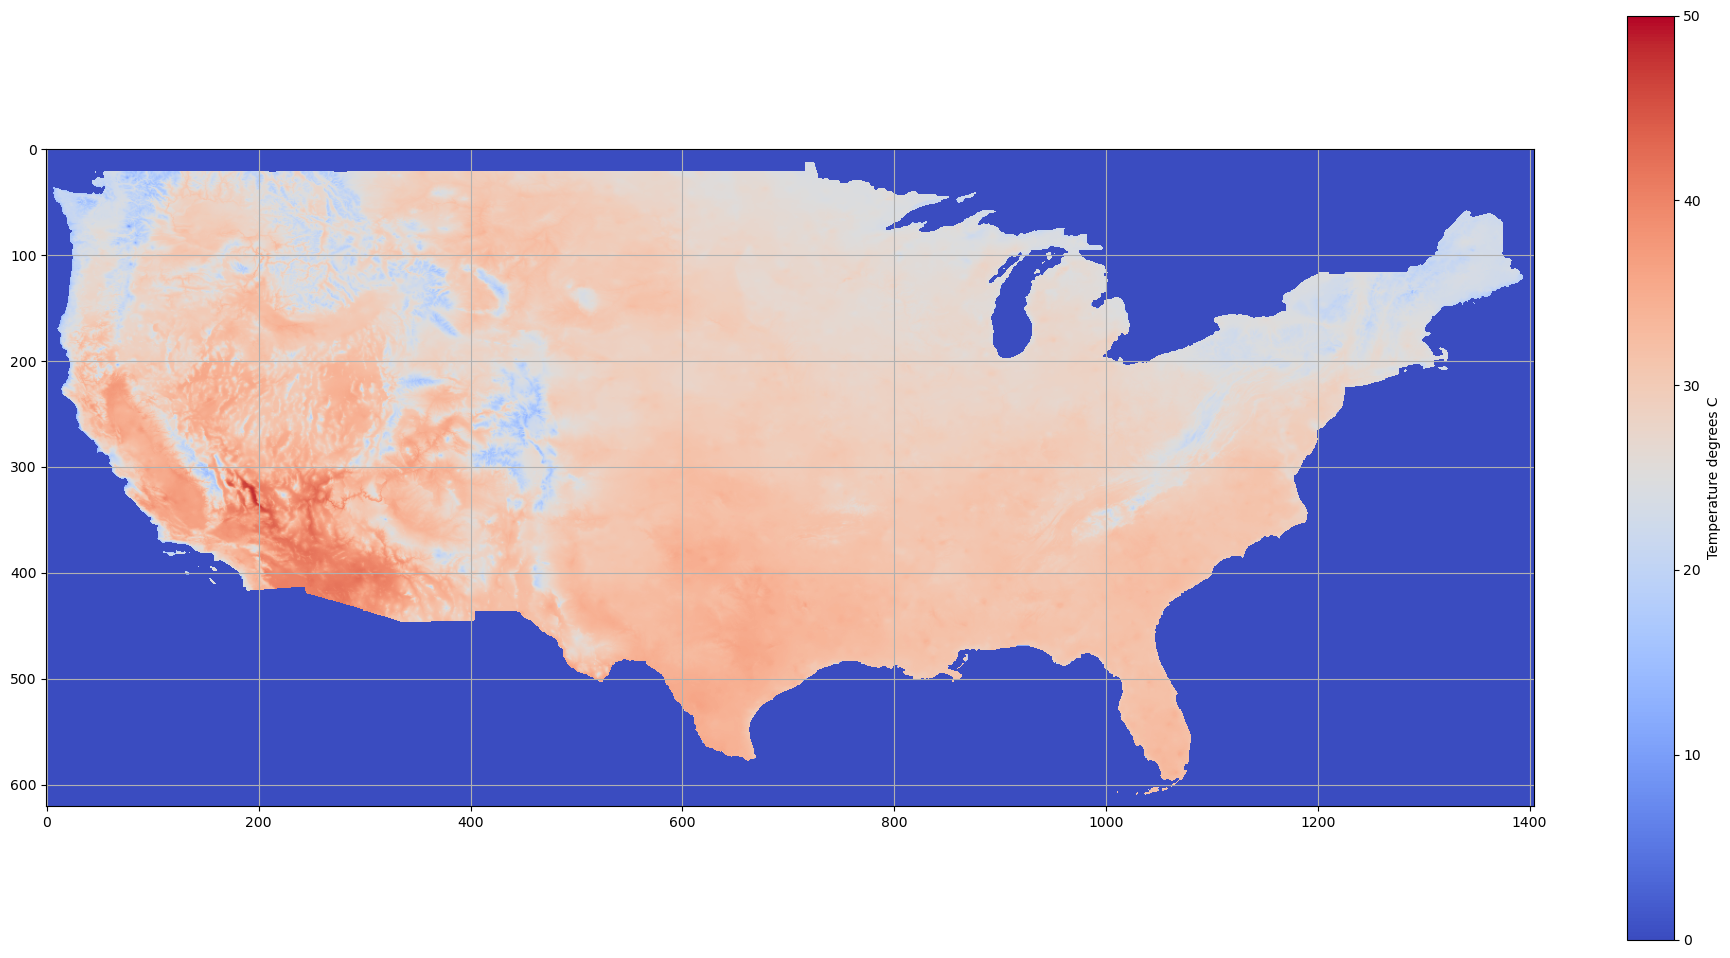

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))
plt.imshow(band1, cmap='coolwarm', vmin=-0, vmax=50)
plt.colorbar(label='Temperature degrees C')
plt.grid()

plt.savefig(os.path.join(working_directory, 'Temperature_figure_1.jpg'), bbox_inches='tight')

There are several resources that will help you make beautiful visualizations using Matplotlib. Check out the matplotlib documentation for starters: https://matplotlib.org/stable/index.html

If you want to change the color map, you can manipulate the cmap='coolwarm' to another color ramp. Colormap options can be chosen from this list in matplotlib's documentatoin: https://matplotlib.org/stable/tutorials/colors/colormaps.html

The figure size can be changed using the figsize=(#,#) line. Simply change the values to find an image size you like most. 

The color bar on the right can be manipulated in many ways. See the matplotlib color bar documentation for more information: https://matplotlib.org/stable/api/_as_gen_/matplotlib.pyplot.colorbar.html. Lastly, the vmin and vmax options specify the range of the color bar. These can be changed depending on the range of your data. For example, summer maximum temperatures may need a vmax=50 as the data is in degress C. 

### Exercise 2: Display PRISM data you previously downloaded

In the first exercise you were tasked with downloading 800m tmax grids for March, May, and July for the years 2005 and 2008. For this exercise you will choose one of these downloaded files, unzip it, and then display the data below. For extra points, see if you can modify some of the other features such as changing the color scheme, vmin/vmax, figure size, and legend titles. 

### Clipping a raster to a boundary

One common task in raster processing is to clip raster files based on a Polygon. To do this we will navigate to the GitHub repository we downloaded, and specifically to the data folder. In this folder is a shapefile with county boundaries for Minnisota titled "MN_counties.shp". First, lets load and quickly look at the vector dataset.

<AxesSubplot:>

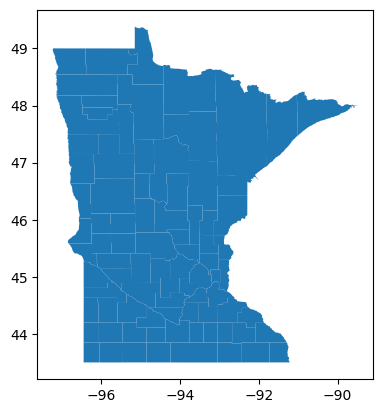

In [75]:
import geopandas as gpd

data_folder = r'E:\EPA - Reproducible workflows\Session 5 - Processing GRIDDED data\Data'
shapefile = os.path.join(data_folder, 'MN_counties.shp')

catchments = gpd.read_file(shapefile)
catchments.plot()

In order to use the features, technically only the polygon geometries, for clipping in Rasterio, we need to provide them in a slightly more low-level format. With fiona we can open vector/feature datasets directly without loading them into a dataframe. Here we extract the “low-level” geometry object with fiona in order to obtain our vector mask.

In [76]:
import fiona

with fiona.open(shapefile, 'r') as vectorfile:
    shapes = [feature["geometry"] for feature in vectorfile]

With this list shapes that we just created we can pass the polygons to the mask function of Rasterio to do the clipping. The clipping itself is pretty straightfoward. Here we demonstrate the opening of the raster dataset without a with block, so simply opening it and working with the filehandle thereof, and eventually closing it again.

In [77]:
from rasterio.mask import mask

PRISM_grid = os.path.join(working_directory, 'PRISM_tmax_stable_4kmM3_200808_bil.bil')
data2 = rasterio.open(PRISM_grid, 'r')

out_image, out_transform = mask(dataset=data2, shapes=shapes, crop=True)
out_meta = data2.meta.copy()
data2.close()

The whole work during the clipping process is very similar to the reprojecting workflow. As we change the dimension of the raster data, because we are literally clipping stuff off it, we have to retrieve a new transform together with the raw data. We keep some of the original meta information again, but we update of course dimensions and transform before we write the new dataset to file.

In [79]:
out_meta.update({"driver": "GTiff",
                "height": out_image.shape[1],
                "width": out_image.shape[2],
                "transform": out_transform})

clipped_image = os.path.join(working_directory, 'MN_tmax_200808.tif')
with rasterio.open(clipped_image, "w", **out_meta) as dest:
    dest.write(out_image)

And let’s load the newly created clipped raster:

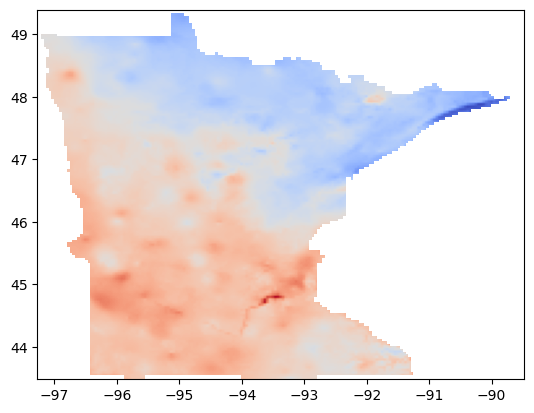

In [82]:
with rasterio.open(clipped_image, 'r') as data3:
    show(data3, cmap='coolwarm')